The dataset is 'Participant-08'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from random import choice
from sklearn import datasets

Connecting to my google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the csv file.

In [ ]:
P8_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-08.csv", sep=",")
P8_data #There should be a variable to storage data read from the csv file.

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


Drop none values.

In [ ]:
P8_data = P8_data.dropna()
P8_data

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


In [ ]:
P8_data.sort_values(by='Start') #Ensure the data are in the correct order.
P8_data

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


In [ ]:
for n in range(0,len(P8_data)):
  P8_data['Start'][n] = P8_data['Start'][n].split(" ")[0]  #Only keep the data about date and ignore the time.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
P8_data

,Start,Finish,Steps (count)
0,01-Jan-2022,01-Jan-2022 01:00,0.0
1,01-Jan-2022,01-Jan-2022 02:00,0.0
2,01-Jan-2022,01-Jan-2022 03:00,0.0
3,01-Jan-2022,01-Jan-2022 04:00,0.0
4,01-Jan-2022,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022,12-Sep-2022 04:00,0.0
6101,12-Sep-2022,12-Sep-2022 05:00,0.0
6102,12-Sep-2022,12-Sep-2022 06:00,25.0
6103,12-Sep-2022,12-Sep-2022 07:00,0.0


In [ ]:
for n in range(0,len(P8_data)):
  if P8_data['Start'][n][3:6]=='Jan':
    P8_data['Start'][n] = "{}{}".format('2022-01-',P8_data['Start'][n][0:2]) # Change month from words into numbers
  if P8_data['Start'][n][3:6]=='Feb':
    P8_data['Start'][n] = "{}{}".format('2022-02-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Mar':
    P8_data['Start'][n] = "{}{}".format('2022-03-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Apr':
    P8_data['Start'][n] = "{}{}".format('2022-04-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='May':
    P8_data['Start'][n] = "{}{}".format('2022-05-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Jun':
    P8_data['Start'][n] = "{}{}".format('2022-06-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Jul':
    P8_data['Start'][n] = "{}{}".format('2022-07-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Aug':
    P8_data['Start'][n] = "{}{}".format('2022-08-',P8_data['Start'][n][0:2])
  if P8_data['Start'][n][3:6]=='Sep':
    P8_data['Start'][n] = "{}{}".format('2022-09-',P8_data['Start'][n][0:2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [ ]:
P8_data

,Start,Finish,Steps (count)
0,2022-01-01,01-Jan-2022 01:00,0.0
1,2022-01-01,01-Jan-2022 02:00,0.0
2,2022-01-01,01-Jan-2022 03:00,0.0
3,2022-01-01,01-Jan-2022 04:00,0.0
4,2022-01-01,01-Jan-2022 05:00,0.0
...,...,...,...
6100,2022-09-12,12-Sep-2022 04:00,0.0
6101,2022-09-12,12-Sep-2022 05:00,0.0
6102,2022-09-12,12-Sep-2022 06:00,25.0
6103,2022-09-12,12-Sep-2022 07:00,0.0


In [ ]:
P8_data.insert(0,'Week','') # Add a new column to storge week number.

In [ ]:
P8_data.groupby('Start')['Steps (count)'].sum()

Start
2022-01-01     7312.0
2022-01-02     7661.0
2022-01-03     6462.0
2022-01-04     5454.0
2022-01-05     8658.0
               ...   
2022-09-08    18149.0
2022-09-09    17792.0
2022-09-10    14373.0
2022-09-11     5636.0
2022-09-12      228.0
Name: Steps (count), Length: 255, dtype: float64

In [ ]:
P8_data['Start'].replace('-','',regex=True,inplace=True)
P8_data['Start'] = pd.to_datetime(P8_data['Start'], format='%Y%m%d') # Change the data type into time data.

In [ ]:
P8_data['Week'] = P8_data['Start'].dt.isocalendar().week # Calculate the wrrk number by python method.
P8_data

,Week,Start,Finish,Steps (count)
0,52,2022-01-01,01-Jan-2022 01:00,0.0
1,52,2022-01-01,01-Jan-2022 02:00,0.0
2,52,2022-01-01,01-Jan-2022 03:00,0.0
3,52,2022-01-01,01-Jan-2022 04:00,0.0
4,52,2022-01-01,01-Jan-2022 05:00,0.0
...,...,...,...,...
6100,37,2022-09-12,12-Sep-2022 04:00,0.0
6101,37,2022-09-12,12-Sep-2022 05:00,0.0
6102,37,2022-09-12,12-Sep-2022 06:00,25.0
6103,37,2022-09-12,12-Sep-2022 07:00,0.0


The week count for the 1st and 2nd in January is wrong. We have to remove that.

In [ ]:
P8_data.drop(P8_data.index[0],inplace=True)
P8_data

,Week,Start,Finish,Steps (count)
48,1,2022-01-03,03-Jan-2022 01:00,0.0
49,1,2022-01-03,03-Jan-2022 02:00,0.0
50,1,2022-01-03,03-Jan-2022 03:00,0.0
51,1,2022-01-03,03-Jan-2022 04:00,0.0
52,1,2022-01-03,03-Jan-2022 05:00,0.0
...,...,...,...,...
6100,37,2022-09-12,12-Sep-2022 04:00,0.0
6101,37,2022-09-12,12-Sep-2022 05:00,0.0
6102,37,2022-09-12,12-Sep-2022 06:00,25.0
6103,37,2022-09-12,12-Sep-2022 07:00,0.0


In [ ]:
P8_data.groupby('Week')['Steps (count)'].sum()

Week
1      51120.0
2      48034.0
3      43866.0
4      52397.0
5      50535.0
6      73614.0
7      51934.0
8      65813.0
9      24575.0
10     54882.0
11     70807.0
12     75102.0
13     64158.0
14     31202.0
15     68882.0
16     82426.0
17     74663.0
18     72412.0
19     83372.0
20     72488.0
21     46161.0
22     46354.0
23     40617.0
24     63485.0
25     58329.0
26     54286.0
27     64436.0
28     41494.0
29     58219.0
30     76015.0
31     73545.0
32     58354.0
33     64107.0
34     61963.0
35     72736.0
36    100094.0
37       228.0
Name: Steps (count), dtype: float64

Sub question: Is the model over-fitted?

We can check the k-value by KNN method. If the K-value is too bit or too small, there may be some error in the model.

In [ ]:
P8_data.groupby('Week')['Steps (count)'].sum().to_csv(r'/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps.csv')# Create a new csv file to storge outcomes.

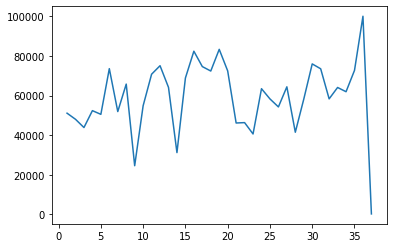

In [ ]:
plt.plot(P8_data.groupby('Week')['Steps (count)'].sum())

KNN
Check weather the model is overfitting.

In [ ]:
SUMdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps.csv", sep=",")
N = 10
iris = SUMdata
X = iris['Week']
y = iris['Steps (count)']
k_candidate = [i for i in range(1,20) if i%2!=0]
fk = StratifiedKFold(n_splits=N, shuffle=True, random_state=37)
maximum_accuracy = 0
best_k = choice(k_candidate)
for k in k_candidate:
    count_accuracy = 0
    for train_index,valid_index in fk.split(X,y):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X[train_index], y[train_index])
        count_accuracy = count_accuracy + clf.score(X[valid_index], y[valid_index])
    count_accuracy = count_accuracy/N
    print('Average accuracy: %.2f' % count_accuracy)
    if count_accuracy > maximum_accuracy:
        maximum_accuracy = count_accuracy
        best_k = k
    print('Best k-value: %d'%best_k,"Maximiase accuracy: %.2f"%maximum_accuracy)
    print("*"*60)
print('Most suitable k-value %d'%best_k,"The accuracy: %.2f"%maximum_accuracy)

ValueError: ignored